In [1]:
import pandas as pd
import numpy as np
import requests, os

In [37]:
from dotenv import load_dotenv
load_dotenv()
sandbox_token = os.getenv('SANDBOX_TOKEN')
live_token = os.getenv('LIVE_TOKEN')
print(sandbox_token and live_token != None)

True


In [12]:
LIVE = True

sandbox_root='https://sandbox.iexapis.com/stable'
live_root='https://cloud.iexapis.com/stable'
if LIVE == True:
    token = live_token
    root = live_root
else:
    token = sandbox_token
    root = sandbox_root

   change  changeOverTime  changePercent  close        date   high  \
0    0.00        0.000000         0.0000  67.40  2019-11-21  68.00   
1   -0.06       -0.000902        -0.0906  67.80  2019-11-22  66.20   
2    1.16        0.017389         1.8343  69.50  2019-11-25  66.81   
3   -0.54        0.008737        -0.8182  66.69  2019-11-26  69.18   
4    0.91        0.023299         1.3456  68.73  2019-11-27  68.00   

        label    low   open  uClose   uHigh    uLow   uOpen   uVolume  \
0  Nov 21, 19  65.80  66.68  269.21  270.78  266.13  270.67  30366688   
1  Nov 22, 19  67.61  67.41  266.00  264.57  263.84  267.22  16334342   
2  Nov 25, 19  66.07  68.42  268.64  275.04  267.81  273.39  21762614   
3  Nov 26, 19  67.00  67.92  273.13  279.54  267.20  267.74  26607710   
4  Nov 27, 19  67.80  68.00  274.95  268.88  272.44  268.57  16545669   

      volume  
0  125976837  
1   66808776  
2   84677323  
3  107252664  
4   67524058  


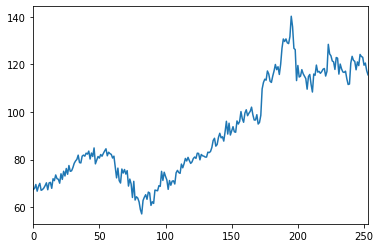

In [7]:
r = requests.get(root + '/stock/{}/chart/{}?token={}'.format('AAPL','1y',token))
test = pd.DataFrame(r.json())
print(test.head())
test['close'].plot.line()

# All market constituents
<p>Index constituent list: https://www.slickcharts.com/sp500
<p>Accessed Nov 24 2020

In [48]:
from bs4 import BeautifulSoup
# from functions.getindex import gettable
with open('splist.htm', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')
    splist = soup.table
spdf = pd.read_html(str(splist))[0]
spdf

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,1,Apple Inc.,AAPL,6.170746,115.29,1.44,(1.26%)
1,2,Microsoft Corporation,MSFT,5.360712,212.18,2.07,(0.98%)
2,3,Amazon.com Inc.,AMZN,4.447659,3108.48,10.09,(0.33%)
3,4,Facebook Inc. Class A,FB,2.175863,274.73,6.30,(2.35%)
4,5,Alphabet Inc. Class A,GOOGL,1.749927,1749.60,22.04,(1.28%)
5,6,Alphabet Inc. Class C,GOOG,1.717169,1755.57,20.71,(1.19%)
6,7,Berkshire Hathaway Inc. Class B,BRK.B,1.534015,234.25,4.71,(2.05%)
7,8,Johnson & Johnson,JNJ,1.277044,144.34,0.47,(0.33%)
8,9,JPMorgan Chase & Co.,JPM,1.211607,122.03,4.16,(3.53%)
9,10,Visa Inc. Class A,V,1.183252,212.62,4.46,(2.14%)


# Get all price data

# Get all financials data